In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
import yfinance as yf

# Define the stock tickers
tickers = ['TSLA', 'BND', 'SPY']

# Download historical data
data = yf.download(tickers, start='2015-01-01', end='2025-01-01')

# Check the columns to understand the data structure
print(data.columns)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [3]:

print(data.head())
print(data.columns)


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573082  172.592911  14.620667  62.603366  173.811145   
2015-01-05  62.754837  169.475922  14.006000  62.777549  171.702325   
2015-01-06  62.936501  167.879608  14.085333  63.125772  170.316050   
2015-01-07  62.974411  169.971603  14.063333  63.050118  170.316070   
2015-01-08  62.875957  172.987778  14.041333  62.921381  173.206226   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.398950  171.542718  14.217333  62.406522   
2015-01-05  14.433333  62.610989  169.165069  13.810667  62.641273   
2015-01-06  14.280000  62.860793  167.073055  13.614000  62.860793   
2015-01-07 

In [4]:
# Check basic statistics
print(data.describe())

# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())


Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      69.271660   313.957382   115.679423    69.373264   315.610190   
std        4.805706   115.831464   114.226440     4.813920   116.392583   
min       61.860916   156.800812     9.578000    61.937335   157.864105   
25%       65.540474   214.664360    17.185167    65.615703   215.321668   
50%       68.239479   276.422653    28.505667    68.364108   277.178195   
75%       72.892391   404.020721   220.205002    72.966624   406.288495   
max       78.823250   605.771179   479.859985    78.920173   607.026962   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     118.250154    6

In [5]:
# Option 1: Interpolate missing values
data = data.interpolate(method='linear')

# Option 2: Fill forward/backward
# data = data.fillna(method='ffill').fillna(method='bfill')

# Double-check for any remaining missing values
print(data.isnull().sum())


Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Compare original and scaled data
print(scaled_data.head())


Price          Close                          High                      \
Ticker           BND       SPY      TSLA       BND       SPY      TSLA   
Date                                                                     
2015-01-02  0.041985  0.035174  0.010723  0.039218  0.035504  0.009519   
2015-01-05  0.052700  0.028232  0.009416  0.049474  0.030809  0.008578   
2015-01-06  0.063410  0.024676  0.009584  0.069979  0.027723  0.008257   
2015-01-07  0.065645  0.029336  0.009538  0.065524  0.027723  0.008338   
2015-01-08  0.059841  0.036054  0.009491  0.057944  0.034157  0.008201   

Price            Low                          Open                      \
Ticker           BND       SPY      TSLA       BND       SPY      TSLA   
Date                                                                     
2015-01-02  0.033968  0.037454  0.010743  0.030307  0.037917  0.011513   
2015-01-05  0.046466  0.032174  0.009835  0.044121  0.033785  0.010324   
2015-01-06  0.061190  0.027528  0.009

In [7]:
# Flatten the columns if multi-indexed
data.columns = ['_'.join(col).strip() for col in data.columns]

print(data.columns)


Index(['Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')


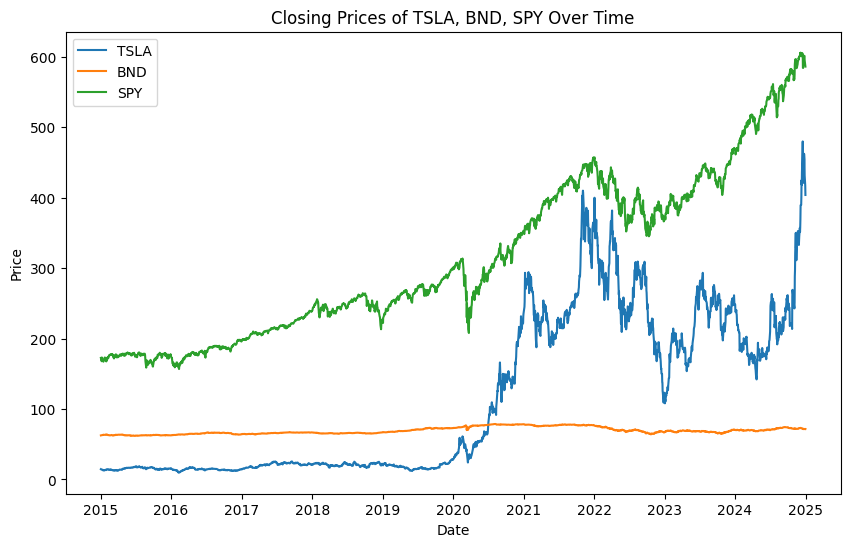

In [8]:
# Plotting the closing prices
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(data.index, data[f'Close_{ticker}'], label=ticker)

plt.title('Closing Prices of TSLA, BND, SPY Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:
 #Flatten the multi-index columns if needed
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Display the columns to verify the structure
print("Original Columns:", data.columns)

# Rename 'Close' columns to match ticker names directly
rename_mapping = {
    'Close_TSLA': 'TSLA',
    'Close_BND': 'BND',
    'Close_SPY': 'SPY'
}

# Only rename if the expected columns exist
available_columns = set(data.columns)
for original, new_name in rename_mapping.items():
    if original in available_columns:
        data = data.rename(columns={original: new_name})

# Verify column names after renaming
print("Renamed Columns:", data.columns)

# Calculate daily percentage change (returns)
returns = data[['TSLA', 'BND', 'SPY']].pct_change().dropna()

# Verify the columns of the 'returns' DataFrame
print("Returns Columns:", returns.columns)

Original Columns: Index(['Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Renamed Columns: Index(['BND', 'SPY', 'TSLA', 'High_BND', 'High_SPY', 'High_TSLA', 'Low_BND',
       'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY', 'Open_TSLA',
       'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Returns Columns: Index(['TSLA', 'BND', 'SPY'], dtype='object')


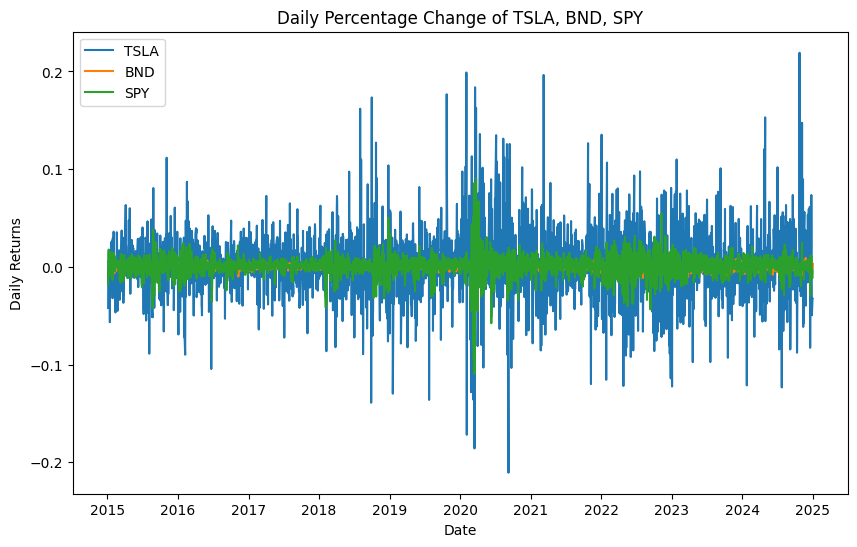

In [10]:
#Plotting the Daily Percentage Changes:
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.title('Daily Percentage Change of TSLA, BND, SPY')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()



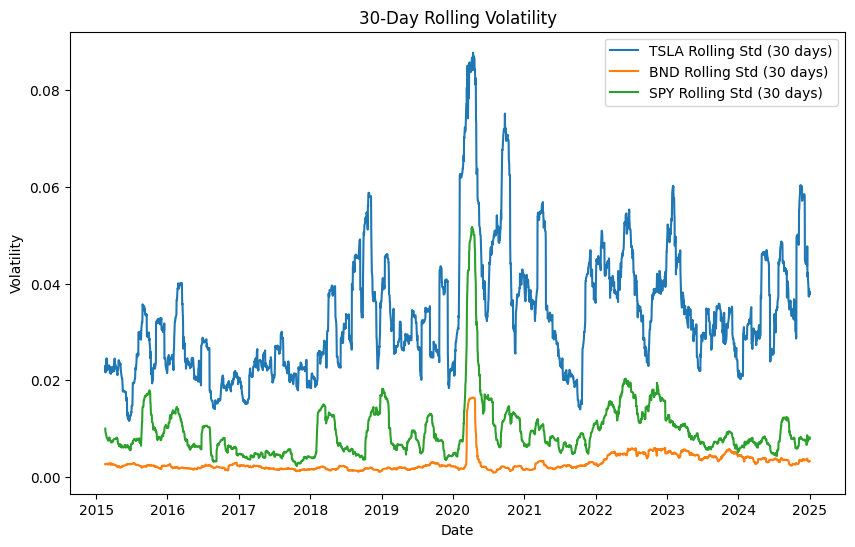

In [11]:
# Volatility Analysis: Rolling Means & Standard Deviations
window_size = 30  # 30-day rolling window

plt.figure(figsize=(10, 6))
for ticker in tickers:
    rolling_std = returns[ticker].rolling(window=window_size).std()
    plt.plot(rolling_std, label=f'{ticker} Rolling Std (30 days)')

plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


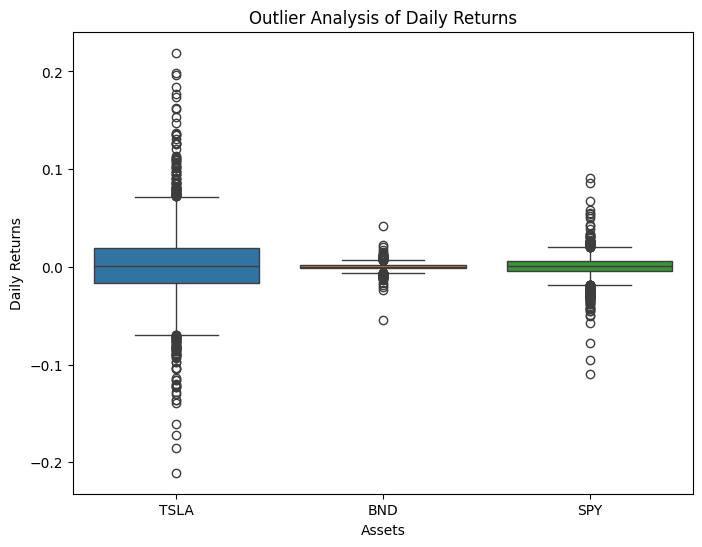

Outliers for TSLA:
count    52.000000
mean      0.009947
std       0.138615
min      -0.210628
25%      -0.120241
50%       0.009717
75%       0.134925
max       0.219190
Name: TSLA, dtype: float64
Outliers for BND:
count    52.000000
mean     -0.000269
std       0.015556
min      -0.054385
25%      -0.010240
50%      -0.000176
75%       0.010628
max       0.042201
Name: BND, dtype: float64
Outliers for SPY:
count    52.000000
mean     -0.002104
std       0.047870
min      -0.109424
25%      -0.038554
50%      -0.002813
75%       0.032731
max       0.090603
Name: SPY, dtype: float64


In [12]:
# Plotting boxplots to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=returns)
plt.title('Outlier Analysis of Daily Returns')
plt.xlabel('Assets')
plt.ylabel('Daily Returns')
plt.show()

# Analyzing extreme values
for ticker in tickers:
    outliers = returns[(returns[ticker] > returns[ticker].quantile(0.99)) | 
                       (returns[ticker] < returns[ticker].quantile(0.01))]
    print(f'Outliers for {ticker}:')
    print(outliers[ticker].describe())


<Figure size 1000x800 with 0 Axes>

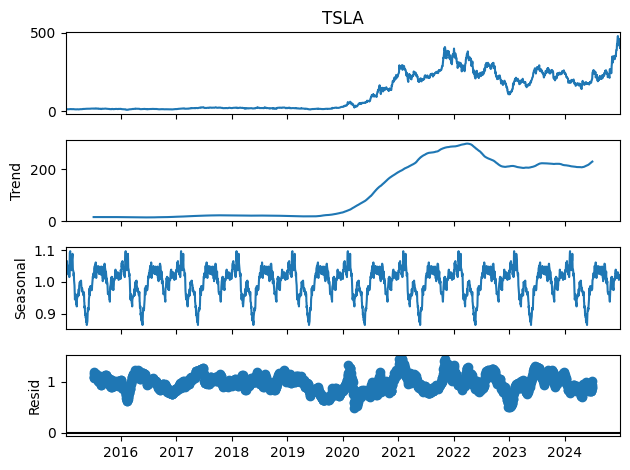

In [13]:
# Decomposition for Tesla stock
decompose_result = seasonal_decompose(data['TSLA'], model='multiplicative', period=252)

# Plotting the decomposition
plt.figure(figsize=(10, 8))
decompose_result.plot()
plt.show()


In [14]:
 #Key Financial Metrics: VaR & Sharpe Ratio
# Value at Risk (VaR)
# 95% VaR assuming normal distribution
var_95 = returns['TSLA'].quantile(0.05)
print(f"95% Value at Risk (VaR) for TSLA: {var_95:.4f}")


95% Value at Risk (VaR) for TSLA: -0.0514


In [15]:
#Sharpe Ratio
# Assuming a risk-free rate of 3% annualized
risk_free_rate = 0.03
trading_days = 252

sharpe_ratio = (returns.mean() * trading_days - risk_free_rate) / (returns.std() * np.sqrt(trading_days))
print(f"Sharpe Ratio for TSLA: {sharpe_ratio['TSLA']:.4f}")


Sharpe Ratio for TSLA: 0.8141


In [16]:
# Define the training and testing split (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

print(f'Training data shape: {train_data.shape}')
print(f'Testing data shape: {test_data.shape}')


Training data shape: (2012, 15)
Testing data shape: (504, 15)


In [20]:
# Select only the 'TSLA' column for closing prices
train_data = train_data[['TSLA']]

# Check the data shape and preview the data
print(train_data.shape)  # Should be (n_samples, 1)
print(train_data.head())



(2012, 1)
                 TSLA
Date                 
2015-01-02  14.620667
2015-01-05  14.006000
2015-01-06  14.085333
2015-01-07  14.063333
2015-01-08  14.041333


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from pmdarima import auto_arima

# Use the correct 'TSLA' column for forecasting
arima_model = auto_arima(train_data['TSLA'],  # Pass as a 1D array
                         seasonal=False, 
                         trace=True, 
                         suppress_warnings=True,
                         stepwise=True)

print(arima_model.summary())


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12578.748, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12574.896, Time=0.08 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12573.929, Time=0.30 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12574.048, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12573.054, Time=0.05 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12574.793, Time=0.91 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.850 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6285.527
Date:                Thu, 27 Feb 2025   AIC                          12573.054
Time:                        17:48:15   BIC                          12578.660
Sample:                             0   HQIC                         12575.112
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        30.3650      0.330     91.884      0.000      29.717

c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

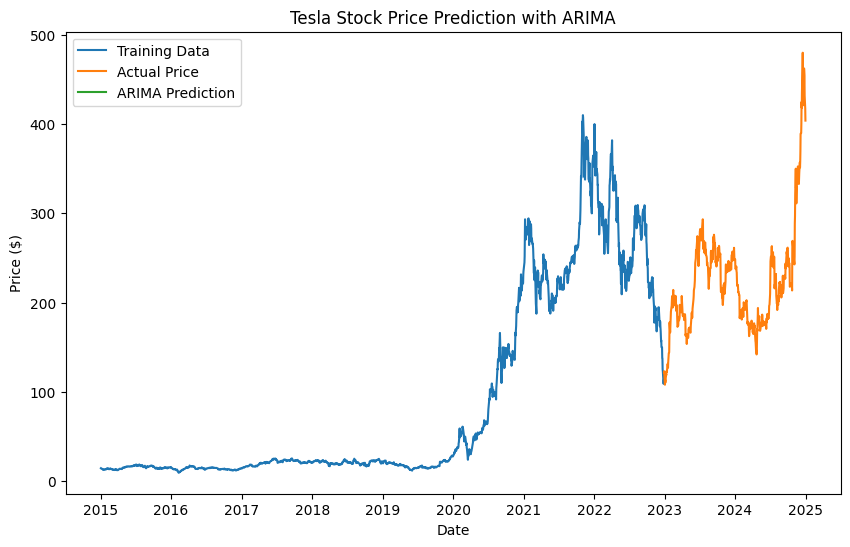

In [24]:
# Train ARIMA with the best found parameters
model_arima = ARIMA(train_data, order=arima_model.order)
model_arima_fit = model_arima.fit()

# Forecast the test set length
forecast_arima = model_arima_fit.forecast(steps=len(test_data))
test_data['ARIMA_Prediction'] = forecast_arima

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TSLA'], label='Training Data')
plt.plot(test_data.index, test_data['TSLA'], label='Actual Price')
plt.plot(test_data.index, test_data['ARIMA_Prediction'], label='ARIMA Prediction')
plt.title('Tesla Stock Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the 

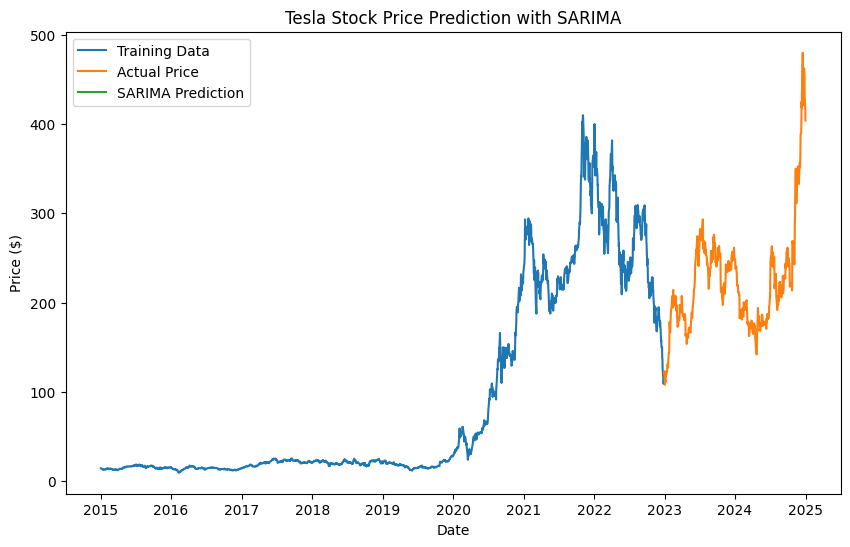

In [25]:
# Define and train the SARIMA model
model_sarima = SARIMAX(train_data, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast using SARIMA
forecast_sarima = model_sarima_fit.forecast(steps=len(test_data))
test_data['SARIMA_Prediction'] = forecast_sarima

# Plot the SARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TSLA'], label='Training Data')
plt.plot(test_data.index, test_data['TSLA'], label='Actual Price')
plt.plot(test_data.index, test_data['SARIMA_Prediction'], label='SARIMA Prediction')
plt.title('Tesla Stock Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM (60 days lookback)
def create_dataset(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Split and reshape data
lookback = 60
X_train, y_train = create_dataset(scaled_data[:train_size], lookback)
X_test, y_test = create_dataset(scaled_data[train_size:], lookback)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [27]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32)


C:\Users\Hasan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 0.0438
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0040
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0042
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0035
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0033
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0030
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0030
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0025
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0029
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0028
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0026
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0025
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0024
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0025
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0024
Epo